In [1110]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from IPython.core.display import display, HTML

In [1129]:
df = pd.read_csv("x_data.csv")
Y = df['y']
df.drop(['index', 'year', 'y'], axis=1,  inplace=True)
df

,age,sex,def,los,art,vis,limf,rad,ater,hyper,smoke,dia
0,64,1,1,0,ЛА,2 вены IJS+IJS,0,0,2,1,0,1
1,52,0,3,1,НСА,2 вены SJS+SJS,1,0,0,0,0,0
2,24,1,2,0,ЛА,2 вены SJS+SJS,0,0,0,0,1,0
3,56,1,3,0,ЯА,2 вены IJS+IJS,0,90,2,0,0,0
4,18,1,1,0,ЛАИ,1 вена IJS,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,35,1,2,0,ЛА,2 вены IJS+SJS,0,0,0,0,1,0
230,28,0,2,0,ЛА,1 вена IJS,1,0,0,0,0,0
231,23,0,2,0,ЯА,1 вена IJS,0,0,0,0,0,0
232,30,1,1,0,ЛАИ,1 вена IJS,0,0,0,0,1,0


In [1094]:
print(df['art'].value_counts(dropna=False))

ЛА     119
ЯА      62
ЛАИ     23
ВЩА     11
ЛАК      6
ПАШ      5
ПВА      4
НСА      4
Name: art, dtype: int64


In [1095]:
print(df['vis'].value_counts(dropna=False))

1 вена IJS        110
2 вены IJS+SJS     58
2 вены IJS+IJS     31
1 вена SJS         21
2 вены SJS+SJS     14
Name: vis, dtype: int64


In [1096]:
print(df['ater'].value_counts(dropna=False))

0    217
2     10
1      7
Name: ater, dtype: int64


In [1097]:
print(df['rad'].value_counts(dropna=False))

0      195
70      16
100      9
80       5
90       3
55       2
85       1
84       1
75       1
65       1
Name: rad, dtype: int64


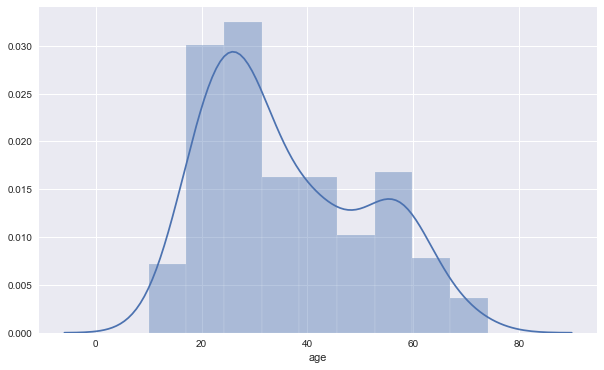

In [1111]:
rad = df['rad']
age = df['age']
sns.distplot(age);

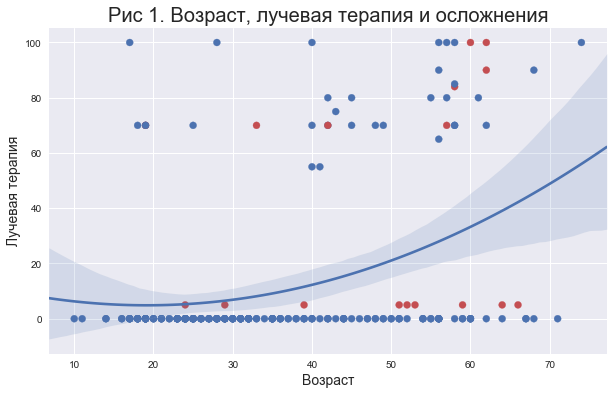

In [1130]:
cc = []
for i, y1 in enumerate(Y):
    color = 'b'
    if y1 == 1:
        color = 'r'
        if rad[i] == 0:
            rad[i] = 5
    cc += [color]
plt.scatter(age, rad,  color=cc);  
sns.regplot(age, rad, fit_reg=True, scatter = False, order=2);
plt.title("Рис 1. Возраст, лучевая терапия и осложнения", fontsize=20);
plt.xlabel("Возраст", fontsize=14);
plt.ylabel("Лучевая терапия", fontsize=14);

In [1132]:
r = df['ater'].copy().astype('int')
r[r==1] = 0
r[r==2] = 1
df['ater2'] = r
xdf = df[['age', 'rad', 'ater2']]
xdf
X = xdf.values
y = Y.values

In [1149]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc, log_loss

clf = LogisticRegression(C=1)
clf.fit(X, y)
proba = clf.predict_proba(X)[:, 1]
loss = log_loss(y, proba)
#plot_roc_curve(clf, X, y)
fpr, tpr, thresholds = roc_curve(y, proba)
fpr
roc_auc = auc(fpr, tpr)
print(loss,roc_auc)

0.23078489077019984 0.8103822174030902


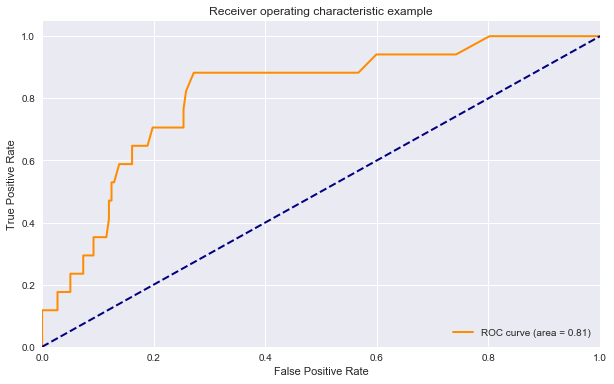

In [1150]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");